<a href="https://colab.research.google.com/github/purduelamm/purdue_me597_iiot/blob/main/lab/lab4/PL4_Colab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prelab 4.1 Middleware 1 - MTConnect agent

## Learning Goals

Students will be able to:

1. Describe the functionality of MTConnect
2. Implement a connection between computer and MTConnect Agent

## 1.1 Introduction


Through previous labs so far, we have collected data from sensors (temperature sensor and accelerometer) and IoT devices (power meter-Modbus and vibration sensor-IO-Link). However, someone may raise a question about how to deal with various devices, sensors, and information if each has different data types, sampling frequencies, even communication protocols. To facilitate and easily use various data streams in a single platform, the middleware concept was developed. Middleware is a kind of software that offers common services and capabilities to applications outside of what's provided by the operating system. Data management, application services, messaging, authentication, and API (Application Programming Interface) are all commonly handled by middleware. The main purpose of middleware is to help developers or users build applications more efficiently. There are a lot of middleware in manufacturing industry such as MTConnect, OPCUA, MQTT, ROS, and so on. Each middleware has distinct characteristics, pros, and cons. For example, in the robot industry, [ROS, Robot Operation System](https://www.ros.org/) is widely utilized as a middleware and open-source platform. In this course, however, we will mainly use MTConnect as a middleware for data aggregation.

MTConnect is an open source and royalty-free standard for manufacturing that is connecting manufacturing equipment with applications by using proven Internet protocols based on XML and HTTP. MTConnect enables real-time data sharing between shop floor equipment such as machine tools and computer systems. In addition, MTConnect offers a semantic vocabulary for manufacturing equipment to provide structured, contextualized data with no proprietary format. With uniform data, developers, integrators, and users can focus on useful, productive manufacturing applications rather than translation (Figure 1). As Figure 1, each machine tool speaks a different language; connectivity and integration are a nightmare without MTConnect standard. Data sources of MTConnect include machine tools, production equipment, PLC, machine controllers, sensors and sensor systems, and other factory hardware. Applications that consume MTConnect data provide more efficient operations, improved production, optimization, and increased productivity. Therefore, MTConnect stands for: 1) Middleware itself to enable real-time data stream on shop floor and 2) MTConnect standard
(ANSI/MTC1.4-2018) which describes a semantic standard vocabulary for manufacturing equipment. In the lab as mentioned above, we will mainly use MTConnect as a middleware for real-time data streaming and applications. If you are interested in MTConnect standard in detail, please visit [MTConnect.org](https://www.mtconnect.org/).  

<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/prelab4_fig1.png?raw=true" width="100%">

*Figure 1 The manufacturing world and applications: before MTConnect (left) and after MTConnect (right)<sup>1</sup>*

---

<sup>1</sup>Source: https://mtcup.org/Getting_Started_with_MTConnect_%E2%80%93_Writing_Client_Applications, available on Feb. 6, 2023





## 1.2 MTConnect Overview


MTConnect as middleware consists of two parts: 1) MTConnect agent and 2) MTConnect adapter as Figure 2. In Lab4 and Lab5, we will explore and practice MTConnect agent and MTConnect adapter, respectively.

<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/prelab4_fig2.png?raw=true" width="80%">

*Figure 2 MTConnect configuration and data flow<sup>2</sup>*

MTConnect standard is broken down into four parts. The four standard sections of MTConnect with the major sub-sections are listed below. MTConnect standard documents (version 1.6, released in Sep. 2020) are uploaded on
[Github repo here](https://github.com/purduelamm/purdue_me597_iiot/tree/main/lab/lab4/MTConnect_Standard_Ver.1.6). Or, you can download the standard documents from the MTConnect institute website
(https://www.mtconnect.org/documents). FYI, the latest version of MTConnect Standard is 2.1 (Jan. 2023).

* MTConnect Standard Part 1
  * Overview and Protocol
    * MTConnect Document Structure
    * Versioning
    * HTTP and XML - Brief Reminder
  * Architecture Overview
    * Request Structure
    * Agent Initialization
    * Application Communication
    * Agent Data and Agent Asset Storage
  * Reply XML Document Structure
    * Devices
    * Streams
    * Assets
    * Error
  * Protocol (Commands to Agent) Overview
    * Probe
    * Sample
    * Current
    * Asset
    * MTConnect Agent and Adapters
* MTConnect Standard Part 2
  * Components
  * Data Items
* MTConnect Standard Part 3
  * Streams
  * Event
  * Samples
  * Conditions
* MTConnect Standard Part 4
  * Assets


---


<sup>2</sup>Source: https://www.mtconnect.org/, available on Feb. 6, 2023



## 1.3 GitHub source for MTConnect

Free and open source developer tools are on [Github of MTConnect Institute](https://github.com/mtconnect/) (Figure 3) and community-maintained. In the MTConnect GitHub page, you will find various programs, adapters and tools. You can appreciate open-source programs by other developers from GitHub page. All about MTConnect agent are on [C++ agent page](https://github.com/mtconnect/cppagent). If you are interested in release history and descriptions about MTConnect agent, please visit the GitHub page and see README.md.

<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/prelab4_fig3.png?raw=true" width="100%">

*Figure 3 MTConnect GitHub*



## 1.4 Install ruby for simulation

In Lab 4, we will run MTConnect agent on both Raspberry Pi (Linux-based Raspberry Pi OS) and laptop (Windows). All
C++ compiled execution files of MTConnect agent on both OS (Operation System) platforms will be given via Github Repo before Lab4. Also, we will simulate MTConnect agent example in Lab 4 based on data we collected in the previous labs. For the simulation, we will use Ruby which is a dynamic, open source, interpreted, high-level programming language. You do not need to know about programming in Ruby. However, it is required to install Ruby on your computers. First, install ‘Ruby’ on your laptop as followed procedure.

---

※ If your laptop is Linux, please visit Ruby website via the link below to install it.

  * [Ruby installation on Ubuntu using apt](https://www.ruby-lang.org/en/documentation/installation/#apt)

---

**The detailed steps below are for Windows 10 laptop.**

1.	Download Ruby installer version 3.3.10 without development kit
  
  a.	Download website: https://rubyinstaller.org/downloads/

  b.  Download 3.3.10-1 (x64) version as shown in the following figure.

  <img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img_S26_update/Prelab4_fig4_1.PNG?raw=true" width="70%">
  <img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img_S26_update/Prelab4_fig4_2.PNG?raw=true" width="70%">
  
2.	Install Ruby by running the downloaded exe. file.
3.	Finish the installation without installing ‘MSY2’ as below.
  
  a.	In the completing window, uncheck the checkbox and click ‘Finish’ as below.

    <img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img_S26_update/Prelab4_fig4_3.PNG?raw=true" width="70%">

To check the installation of ‘ruby’ and see the version, use ‘Command Prompt’ as below.

---

**<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/icon_Windows.png?raw=tru" width="20">Windows - Command Prompt**

`ruby -v`

---


<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img_S26_update/Prelab4_fig4_4.PNG?raw=true" width="70%">

*Figure 4 Ruby version check on Windows*

**If you get error when checking the version of ruby, try to install *'MSYS2'* from https://www.msys2.org/**

### Task 1.1

After installing Ruby on laptop, capture Command Prompt of running ‘ruby -v’ command as Figure 4 and place on the next block.

---

Place your screenshot in here.
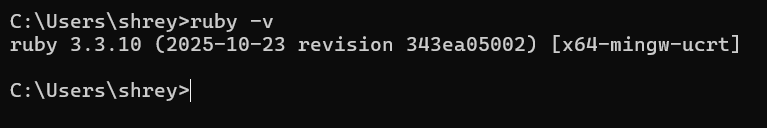
---

Second, install ‘ruby’ on Raspberry Pi as followed procedure.

1. Make Raspberry Pi up to date.

---

**<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/icon_RaspberryPi.png?raw=tru" width="20">Raspberry Pi - Terminal**

`sudo apt update`

`sudo apt upgrade`

---

2. Install 'ruby' using 'apt install' command

---

**<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/icon_RaspberryPi.png?raw=tru" width="20">Raspberry Pi - Terminal**

`sudo apt-get install wine`

`sudo apt install ruby -y`

---

To check the installation of ‘ruby’ and see the version, use ‘Terminal’ as below.

---

**<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img/icon_RaspberryPi.png?raw=tru" width="20">Raspberry Pi - Terminal**

`ruby -v`

---

<img src="https://github.com/purduelamm/purdue_me597_iiot/blob/main/lab/img_S26_update/Prelab4_fig5.PNG?raw=true" width="70%">

*Figure 5 Ruby Version Check on Raspberry Pi*




### Task 1.2

After installing Ruby on Raspberry Pi, capture Terminal of running ‘ruby -v’ command as Figure 5 and attach it in the prompt below.

---

Place your screenshot in here.
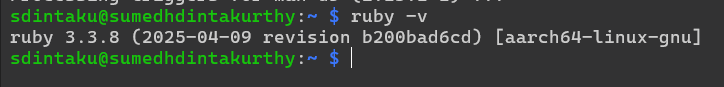
---

### Related Websites and Further Reading

* MTConnect official website: https://www.mtconnect.org/
* MTConnect user portal (Community): https://mtcup.org/
* MTConnect Institute GitHub: https://github.com/mtconnect
* MTConnect C++ agent: https://github.com/mtconnect/cppagent
* MTConnect dot net SDK (C#): https://github.com/mtconnect/dot_net_sdk
* MTConnect PocketNC_adapter (Python): https://github.com/mtconnect/PocketNC_adapter
* MtconnectCore (by TAMS): https://mtconnectcore.dev/
* MTConnect agent example (by Mazak): http://mtconnect.mazakcorp.com/
* Smart Manufacturing Systems (SMS) Test Bed (by NIST): https://www.nist.gov/laboratories/toolsinstruments/smart-manufacturing-systems-sms-test-bed


###Task 1.3

Check the following resources and answer the follow-up questions.

1.	Why is middleware needed?
2.	What are MTConnect and its applications?

  a.	Summarize MTConnect briefly and possible applications.
3.	What are pros and cons of MTConnect?

  a.	Compare with other middleware
4.	What is XML document?
5.	What is HTTP?


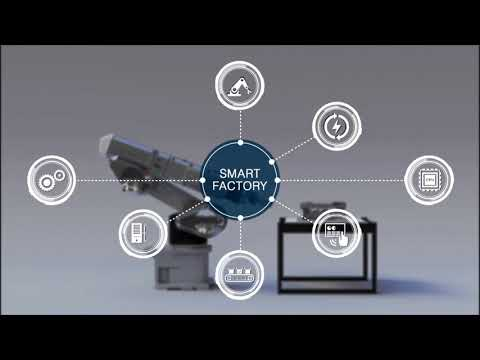

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('p59jonxxIII')
#Watch this video.

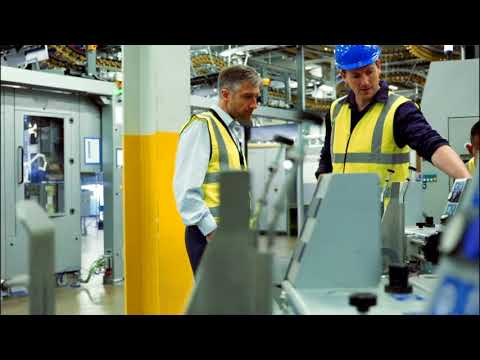

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('hUeLAkqWt1M')
#Watch this video.

#### 1) Why is middleware needed?



---

Write down your answer to 1) here.
Protocol translation - to translate indsutrial protocols to languages that the cloud can understand
Data Normalization - Converting machine raw data to useful data
Buffering - In case cloud goes down, the middleware can keep capturing data locally
---



#### 2) What is MTConnect? Describe some of its applications.


---

Write down your answer to 2) here.
MTConnect is manufacturing data communication standard that allows factory machines to share data in a structured standard format. It can be used for Production Monitroing, Predictive Maintenance, Toold Condition Monitoring, Energy Monitoring etc..
---



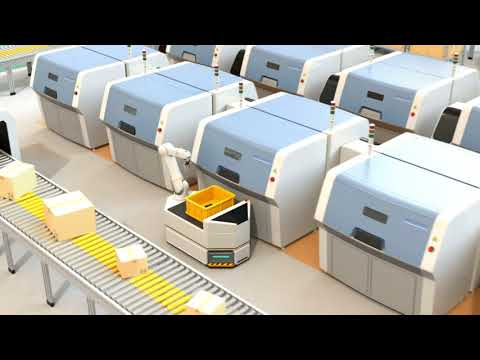

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('sAityNwwyJE')
#Watch this video.

#### 3) Describe pros and cons of MTConnect. Compare it with other middleware


---

Write down your answer to 3) here.
Pros:
It is open and vendor neutral.
Standarized data model
Simple architecture
Cons:
Its read only.
It has limited real-time performance
---



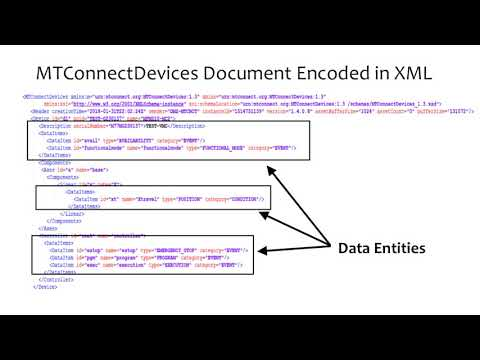

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('HggTJVtJEag')
#Watch this video.

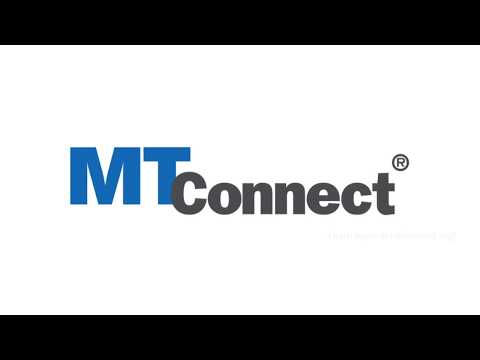

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('_zItx6ndfAs')

#Watch this video.

#### 4) Describe what is an XML document?


---

Write down your answer to 4) here.
XML is a text file that stores data using structured tags
---



#### 5) Describe what is HTTP?


---

Write down your answer to 5) here.
HyperText Transfer Protocol is the communication protocol used by web.
---



<br></br>

Get back to [Lab Index Page](https://colab.research.google.com/github/purduelamm/purdue_me597_iiot/blob/main/index.ipynb)